# RNN playground

In [1]:
# import numpy as np
# import tensorflow as tf

# N (samples) x D (features) x T (time teps)

# example stock price
# T=10 -> 10
# D = 1 -> stock price is the only feature
# N number of windows in time series
# 100 stock prices
# window = T = 10
# 100 - 10 + 1 (L - T + 1)
# D = 500 -> 500 prices of different stocks

# N x D
# N x H x W x C
# tensorflow N x D x T

# number of steps you want to predict is called horizon

In [2]:
#%pip install tensorflow
#%pip install matplotlib
#%pip install scikit-learn

In [3]:
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

2023-01-16 21:02:06.229048: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-16 21:02:06.559827: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-16 21:02:06.559892: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-16 21:02:08.745184: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [4]:
# df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/Starbucks%20satisfactory%20survey.csv')
df = pd.read_csv('https://raw.githubusercontent.com/gupta24789/Machine-Learning-Datasets/master/starbucks.csv')

In [5]:
df

,Date,Close,Volume
0,2015-01-02,38.0061,6906098
1,2015-01-05,37.2781,11623796
2,2015-01-06,36.9748,7664340
3,2015-01-07,37.8848,9732554
4,2015-01-08,38.4961,13170548
...,...,...,...
1001,2018-12-24,60.5600,6323252
1002,2018-12-26,63.0800,16646238
1003,2018-12-27,63.2000,11308081
1004,2018-12-28,63.3900,7712127


In [6]:
series = df['Close'].values.reshape(-1,1)
#series = series[:1000]
series

array([[38.0061],
       [37.2781],
       [36.9748],
       ...,
       [63.2   ],
       [63.39  ],
       [64.4   ]])

In [7]:
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

In [8]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D = 1
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (996, 10, 1) Y.shape (996,)


In [9]:
i = Input(shape=(T,1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss = 'mse', optimizer=Adam(learning_rate=0.1))

# train
r = model.fit( X[:-N//2], Y[:-N//2], epochs=80,
validation_data=(X[-N//2:], Y[-N//2:]))

2023-01-16 21:02:15.487882: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-16 21:02:15.487945: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-16 21:02:15.487982: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2023-01-16 21:02:15.488413: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/80
16/16 [==============================] - 5s 72ms/step - loss: 0.2806 - val_loss: 0.2561
Epoch 2/80
16/16 [==============================] - 0s 21ms/step - loss: 0.0377 - val_loss: 0.1300
Epoch 3/80
16/16 [==============================] - 0s 15ms/step - loss: 0.0243 - val_loss: 0.0958
Epoch 4/80
16/16 [==============================] - 0s 13ms/step - loss: 0.0221 - val_loss: 0.0869
Epoch 5/80
16/16 [==============================] - 0s 16ms/step - loss: 0.0231 - val_loss: 0.1199
Epoch 6/80
16/16 [==============================] - 0s 17ms/step - loss: 0.0210 - val_loss: 0.0814
Epoch 7/80
16/16 [==============================] - 0s 16ms/step - loss: 0.0213 - val_loss: 0.0871
Epoch 8/80
16/16 [==============================] - 0s 17ms/step - loss: 0.0238 - val_loss: 0.0755
Epoch 9/80
16/16 [==============================] - 0s 17ms/step - loss: 0.0237 - val_loss: 0.0767
Epoch 10/80
16/16 [==============================] - 0s 16ms/step - loss: 0.0231 - val_loss: 0.0822
Epoch 11/

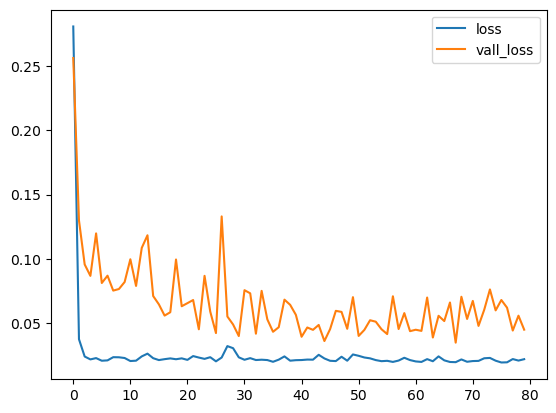

In [10]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='vall_loss')
plt.legend()

32/32 [==============================] - 0s 5ms/step
(996, 1)


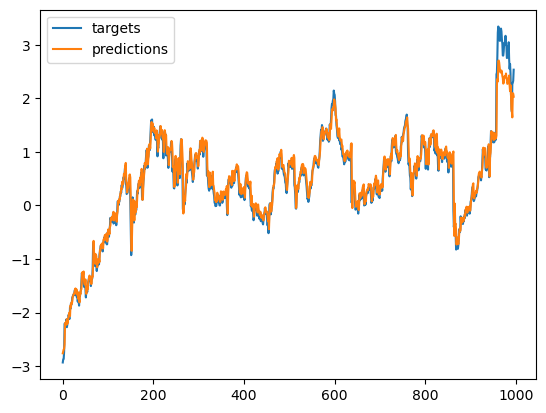

In [13]:
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]
plt.plot(Y, label = 'targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()

Wow, looks like a perfect model for predicting time series, but let's try to predict more timestamps

1/1 [==============================] - 0s 30ms/step


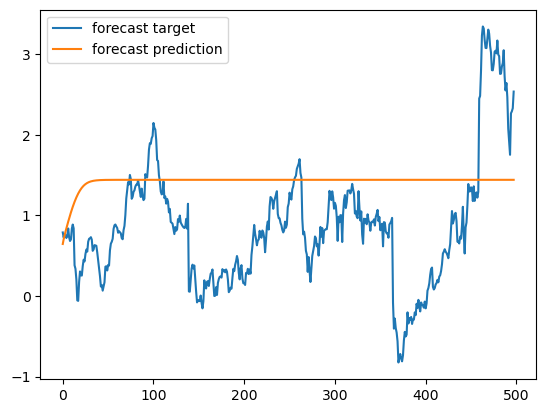

In [14]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N // 2]

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, T, 1))[0, 0] # 1x1 arr

    validation_predictions.append(p)

    last_x = np.roll(last_x, -1)
    last_x[-1] = p

plt.plot(validation_target, label = 'forecast target')
plt.plot(validation_predictions, label = 'forecast prediction')
plt.legend()